# The Effect of Course Delivery Mode on Student Performance and Student Satisfaction: A Case Study

## 1.0 Introduction

The following analysis tests the hypothesis that the delivery mode of a course does not have an effect on student performance (H1). The analysis is based on the data collected from a course in the Master of Business Analytics and Information Systems at the University of South Florida. The data includes the final grades of students in the course, as well as their responses to a survey about their satisfaction with the course. The course was offered in three different delivery modes: in-person, asyynchronous online, and synchronous online (via Micosoft Teams). The analysis compares the final grades and satisfaction scores of students in the two delivery modes to determine if there is a statistically significant difference between them.

## 2.0 Data Preparation

Here we load the python libraries necessary for our analysis, load the data into dataframes and prepare the data for analysis. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

We load the student performance data into a pandas dataframe and clean the data by removing any rows with missing values. We also display the first few rows of the dataframe to get an idea of the data. Finally, we add a total, and a total percentage column to the dataframe.

In [2]:
# read aggregate results into dataframe
df = pd.read_csv('aggregate-performance-results.csv')

print("Total missing values:", df.isnull().sum().sum())

df.head()

Total missing values: 0


,Tableau Exercise 1,Tableau Exercise 2,Tableau Exercise 3,Power BI Exercise 1,Power BI Exercise 2,Python Exercise,R Exercise,Final Project,Delivery Mode
0,30,30,60,30,30,45,45,200,Asynch
1,29,28,60,28,30,40,45,197,Asynch
2,28,30,55,26,30,45,40,198,Asynch
3,30,30,58,30,25,45,45,190,Asynch
4,22,30,53,30,19,45,45,198,Asynch


Next, we calculate a total score for each student by summing the scores of all the questions in the survey. We then calculate the average total score for each delivery mode and display the results in a bar chart. This total will the dependent variable in our analysis.

In [3]:
# Tableau Exercise 1, 2, Power BI Exercise 1, 2 are out of 30 points
# Tableau Exercise 3 is out of 60 points
# Python and R exercises are out of 45 points
# Final Exam is out of 200 points
# Total points is out of 370 points

df['Total'] = sum([df['Tableau Exercise 1'], df['Tableau Exercise 2'], df['Tableau Exercise 3'], df['Power BI Exercise 1'], df['Power BI Exercise 2'], df['Python Exercise'], df['R Exercise'], df['Final Project']])
df['Total Percentage'] = df['Total']/470

df

,Tableau Exercise 1,Tableau Exercise 2,Tableau Exercise 3,Power BI Exercise 1,Power BI Exercise 2,Python Exercise,R Exercise,Final Project,Delivery Mode,Total,Total Percentage
0,30,30,60,30,30,45,45,200,Asynch,470,1.000000
1,29,28,60,28,30,40,45,197,Asynch,457,0.972340
2,28,30,55,26,30,45,40,198,Asynch,452,0.961702
3,30,30,58,30,25,45,45,190,Asynch,453,0.963830
4,22,30,53,30,19,45,45,198,Asynch,442,0.940426
...,...,...,...,...,...,...,...,...,...,...,...
133,23,30,52,26,28,45,40,192,Synch,436,0.927660
134,28,26,57,30,30,45,45,198,Synch,459,0.976596
135,26,30,57,29,30,45,45,188,Synch,450,0.957447
136,28,30,53,28,30,45,45,183,Synch,442,0.940426


## 3.0 ANOVA Test

ANOVA test to determine if there is a significant difference in the mean total scores between the different groups. 

To conduct ANOVA, we need to verify two condidtions:

1. The dependent variable should be approximately normally distributed for each group.
2. The variance of the dependent variable should be approximately equal for each group.

### 3.1 Check for the normality of the data

We first plot the distributions, and then check the normality of the data using the Shapiro-Wilk test. We will check homogeneity of variance using the Levene test. 

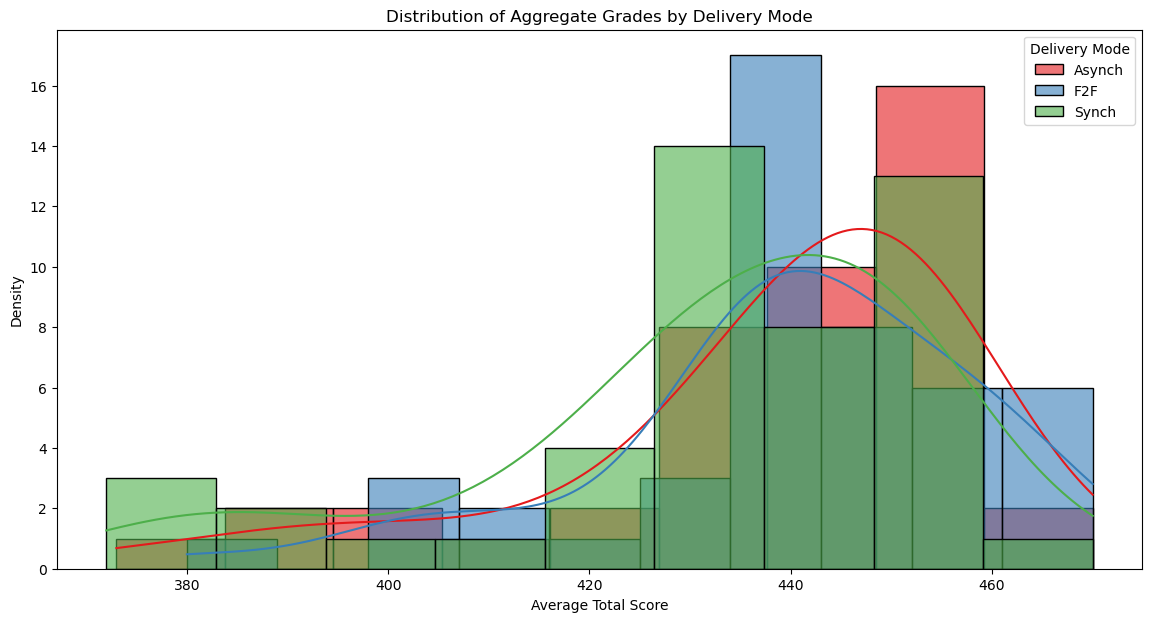

In [4]:
# Plot distribution of aggregate grades for each delivery mode

plt.figure(figsize=(14, 7))
modes = df['Delivery Mode'].unique()
palette = sns.color_palette("Set1", n_colors=len(modes))

# Plot distribution for each mode with enhanced colors
for i, mode in enumerate(modes):
    subset = df[df['Delivery Mode'] == mode]
    sns.histplot(subset['Total'], kde=True, label=mode, color=palette[i], alpha=0.6)

plt.title('Distribution of Aggregate Grades by Delivery Mode')
plt.xlabel('Average Total Score')
plt.ylabel('Density')
plt.legend(title='Delivery Mode')
plt.show()


In [5]:
# Test for normality using Shapiro-Wilk test
for mode in modes:
    subset = df[df['Delivery Mode'] == mode]['Total']
    stat, p = stats.shapiro(subset)
    print(f'Normality test for mode {mode}: Statistics={stat:0.5f}, p={p:0.5f}')

# Test for homogeneity of variances using Levene's test
stat, p = stats.levene(
    df[df['Delivery Mode'] == 'Asynch']['Total'],
    df[df['Delivery Mode'] == 'F2F']['Total'],
    df[df['Delivery Mode'] == 'Synch']['Total']
)
print(f'Homogeneity of variances test: Statistics={stat:0.5f}, p={p:0.5f}')


Normality test for mode Asynch: Statistics=0.86211, p=0.00009
Normality test for mode F2F: Statistics=0.92779, p=0.00630
Normality test for mode Synch: Statistics=0.89504, p=0.00050
Homogeneity of variances test: Statistics=0.42914, p=0.65195


These results indicate normality (p 0.0016, 0.0038 and 0.0001 =  < 0.05>), and the variance between groups is not significantly different (p = 0.59 > 0.05).

**The data meets the assumptions of the ANOVA test.**